In [14]:
%pylab inline
#import matplotlib as mpl
#mpl.rcParams['mathtext.default'] = 'rm'

Populating the interactive namespace from numpy and matplotlib


In [15]:
import sygma as s
import numpy as np
import pandas as pd
import h5py, itertools, scipy.stats
import matplotlib.pyplot as plt
import sys, os, re
from scipy.special import erf
from scipy.optimize import curve_fit
from random import gauss

In [48]:
s1 = s.sygma(iniZ=0.0001, tend=1e10,mgal=1e9)

SYGMA run in progress..
   SYGMA run completed - Run time: 0.05s


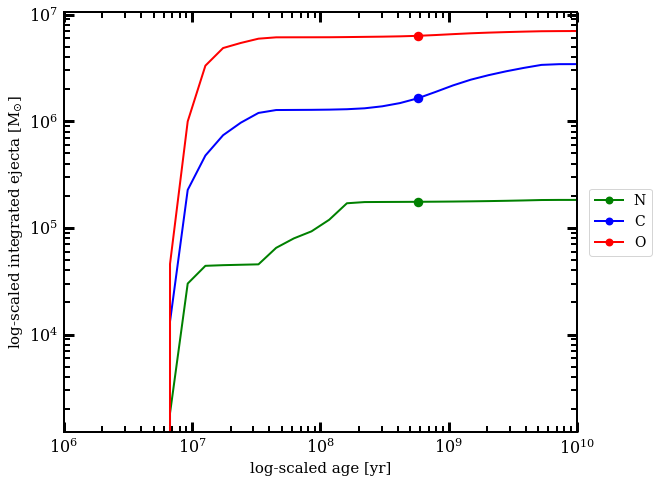

In [42]:
plt.figure(1,(15,8))
s1.plot_mass(fig=1,source='all',specie='N',color='g')
s1.plot_mass(fig=1,source='all',specie='C',color='b')
s1.plot_mass(fig=1,source='all',specie='O',color='r')

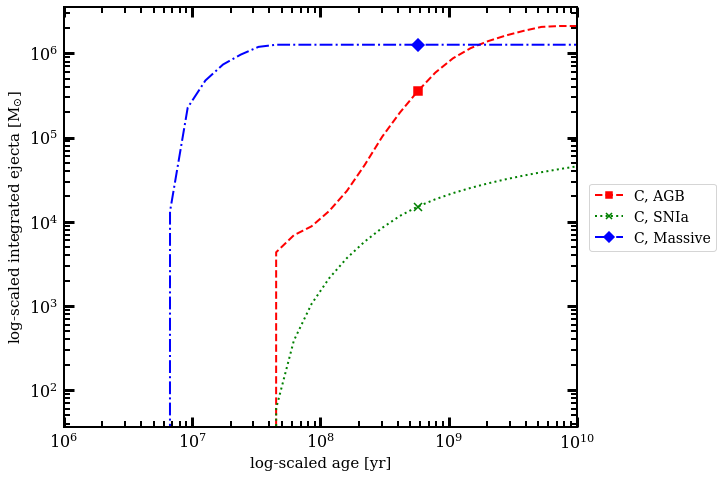

In [43]:
plt.figure(2,(15,8))
s1.plot_mass(fig=2,source='agb')
s1.plot_mass(fig=2,source='sn1a')
s1.plot_mass(fig=2,source='massive')

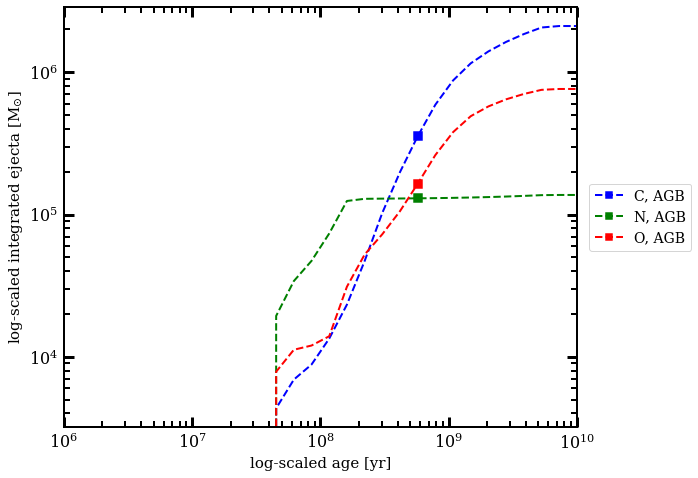

In [44]:
#So I want AGB ejecta that wont be blown away by Sn, so only AGB material after ~40 Myrs
#This seems to already be included in the model? And is why there is a large step
#to the AGB material in the plot above

plt.figure(3,(15,8))
s1.plot_mass(fig=3,source='agb',color='b')
s1.plot_mass(fig=3,source='agb',specie='N',color='g')
s1.plot_mass(fig=3,source='agb',specie='O')

In [46]:
#Okay NGC 2808 is 8.5e5 in stellar mass, and the population that is believed to be P1 (pop B)
#contains 17% of the stars so that would

M_star = 0.17*8.5e5
s2 = s.sygma(iniZ=0.001, tend=6e8,mgal=M_star)

SYGMA run in progress..
   SYGMA run completed - Run time: 0.05s


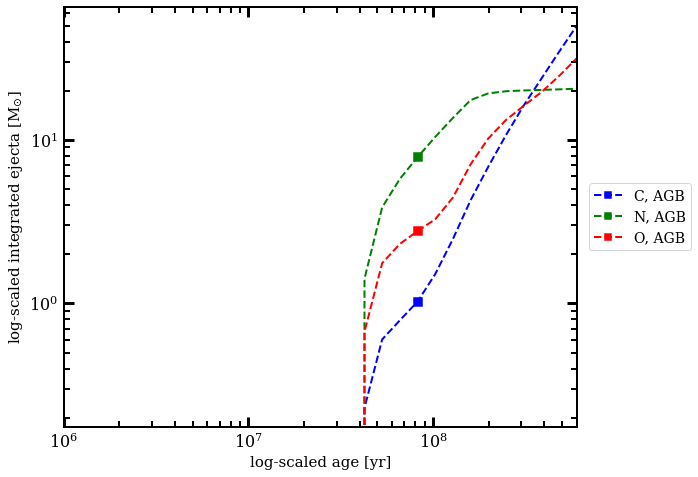

In [47]:
plt.figure(3,(15,8))
s2.plot_mass(fig=3,source='agb',color='b')
s2.plot_mass(fig=3,source='agb',specie='N',color='g')
s2.plot_mass(fig=3,source='agb',specie='O')

In [49]:
s2

In [67]:
time_array = s2.history.age

In [70]:
elements = s2.history.elements
agb_element_yield = s2.history.ism_elem_yield_agb
print(elements,len(elements),len(time_array))

['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi'] 81 31


31 31


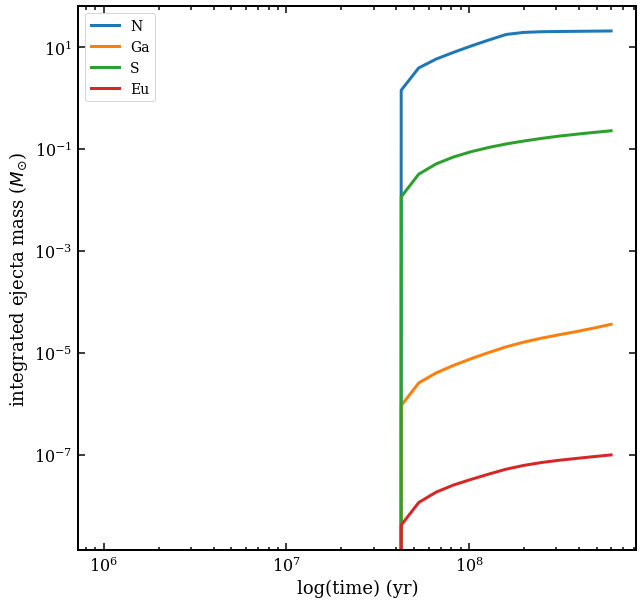

In [91]:
agb_element_yield = np.array(s2.history.ism_elem_yield_agb)

fig1 = figure(1,(10,10))

print(len(time_array),len(agb_element_yield[:,6]))

plt.plot(time_array,agb_element_yield[:,6],linewidth=3,label=elements[6])
plt.plot(time_array,agb_element_yield[:,30],linewidth=3,label=elements[30])
plt.plot(time_array,agb_element_yield[:,15],linewidth=3,label=elements[15])
plt.plot(time_array,agb_element_yield[:,60],linewidth=3,label=elements[60])
#plt.plot(time_array,agb_element_yield[30])

#plt.xlim([3.0,6.0])
#plt.ylim([22,19])
#plt.xlabel('F275W-F814W')
#plt.ylabel('F275W')
plt.xlabel('log(time) (yr)')
plt.ylabel(r'integrated ejecta mass ($M_{\odot}$)')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc=2)
plt.show()

In [82]:
np.array(agb_element_yield)[:,0]

array([    0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,   633.59277525,  1763.52884844,
        2824.62155441,  3884.2993486 ,  4954.95458509,  6032.5260652 ,
        7127.37981212,  8201.22445474,  9310.86743813, 10431.13567434,
       11472.68425521, 12522.68808968, 13579.14855707])

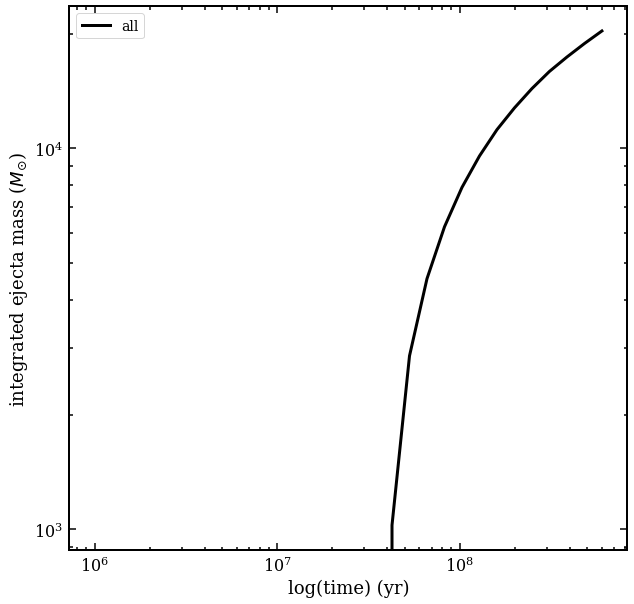

In [94]:
fig1 = figure(1,(10,10))

total_mass = np.sum(agb_element_yield,axis=1)

plt.plot(time_array,total_mass,linewidth=3,label='all',color='k')
#plt.plot(time_array,agb_element_yield[30])

#plt.xlim([3.0,6.0])
#plt.ylim([22,19])
#plt.xlabel('F275W-F814W')
#plt.ylabel('F275W')
plt.xlabel('log(time) (yr)')
plt.ylabel(r'integrated ejecta mass ($M_{\odot}$)')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc=2)
plt.show()

In [95]:
a = 0.03054

1.0/a - 1.0



31.74394237066143